In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt




In [6]:
words = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [16]:
len(words)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:c for i,c in stoi.items()}

In [35]:
for item in data:
    item = f'.{item.strip()}.'
    for i in range(len(item)-1):
        key = (item[i], item[i+1])
        bigram[key] = (0 if not key in bigram else bigram[key])+1

In [42]:
sorted(bigram.items(), key=lambda x: -x[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [65]:
# all possible values
pv = set()
for item in data:
    for ch in item.strip():
        pv.add(ch)
pv = list(pv)
pv.sort()
pv.append('.')
pv = list(pv)
def atoi(x): return pv.index(x)


atoi('a')
atoi('.')
pv


def itoa(x): return pv[x]


itoa(26)

'.'

In [66]:
# We need to index to arrays
N = torch.zeros((27, 27), dtype=int)

for item in data:
    item = f'.{item.strip()}.'
    for i in range(len(item)-1):
        N[atoi(item[i]), atoi(item[i+1])] = N[atoi(item[i]), atoi(item[i+1])]+1

In [82]:
N[5, 10]

bigram[('a', 'h')]

2332

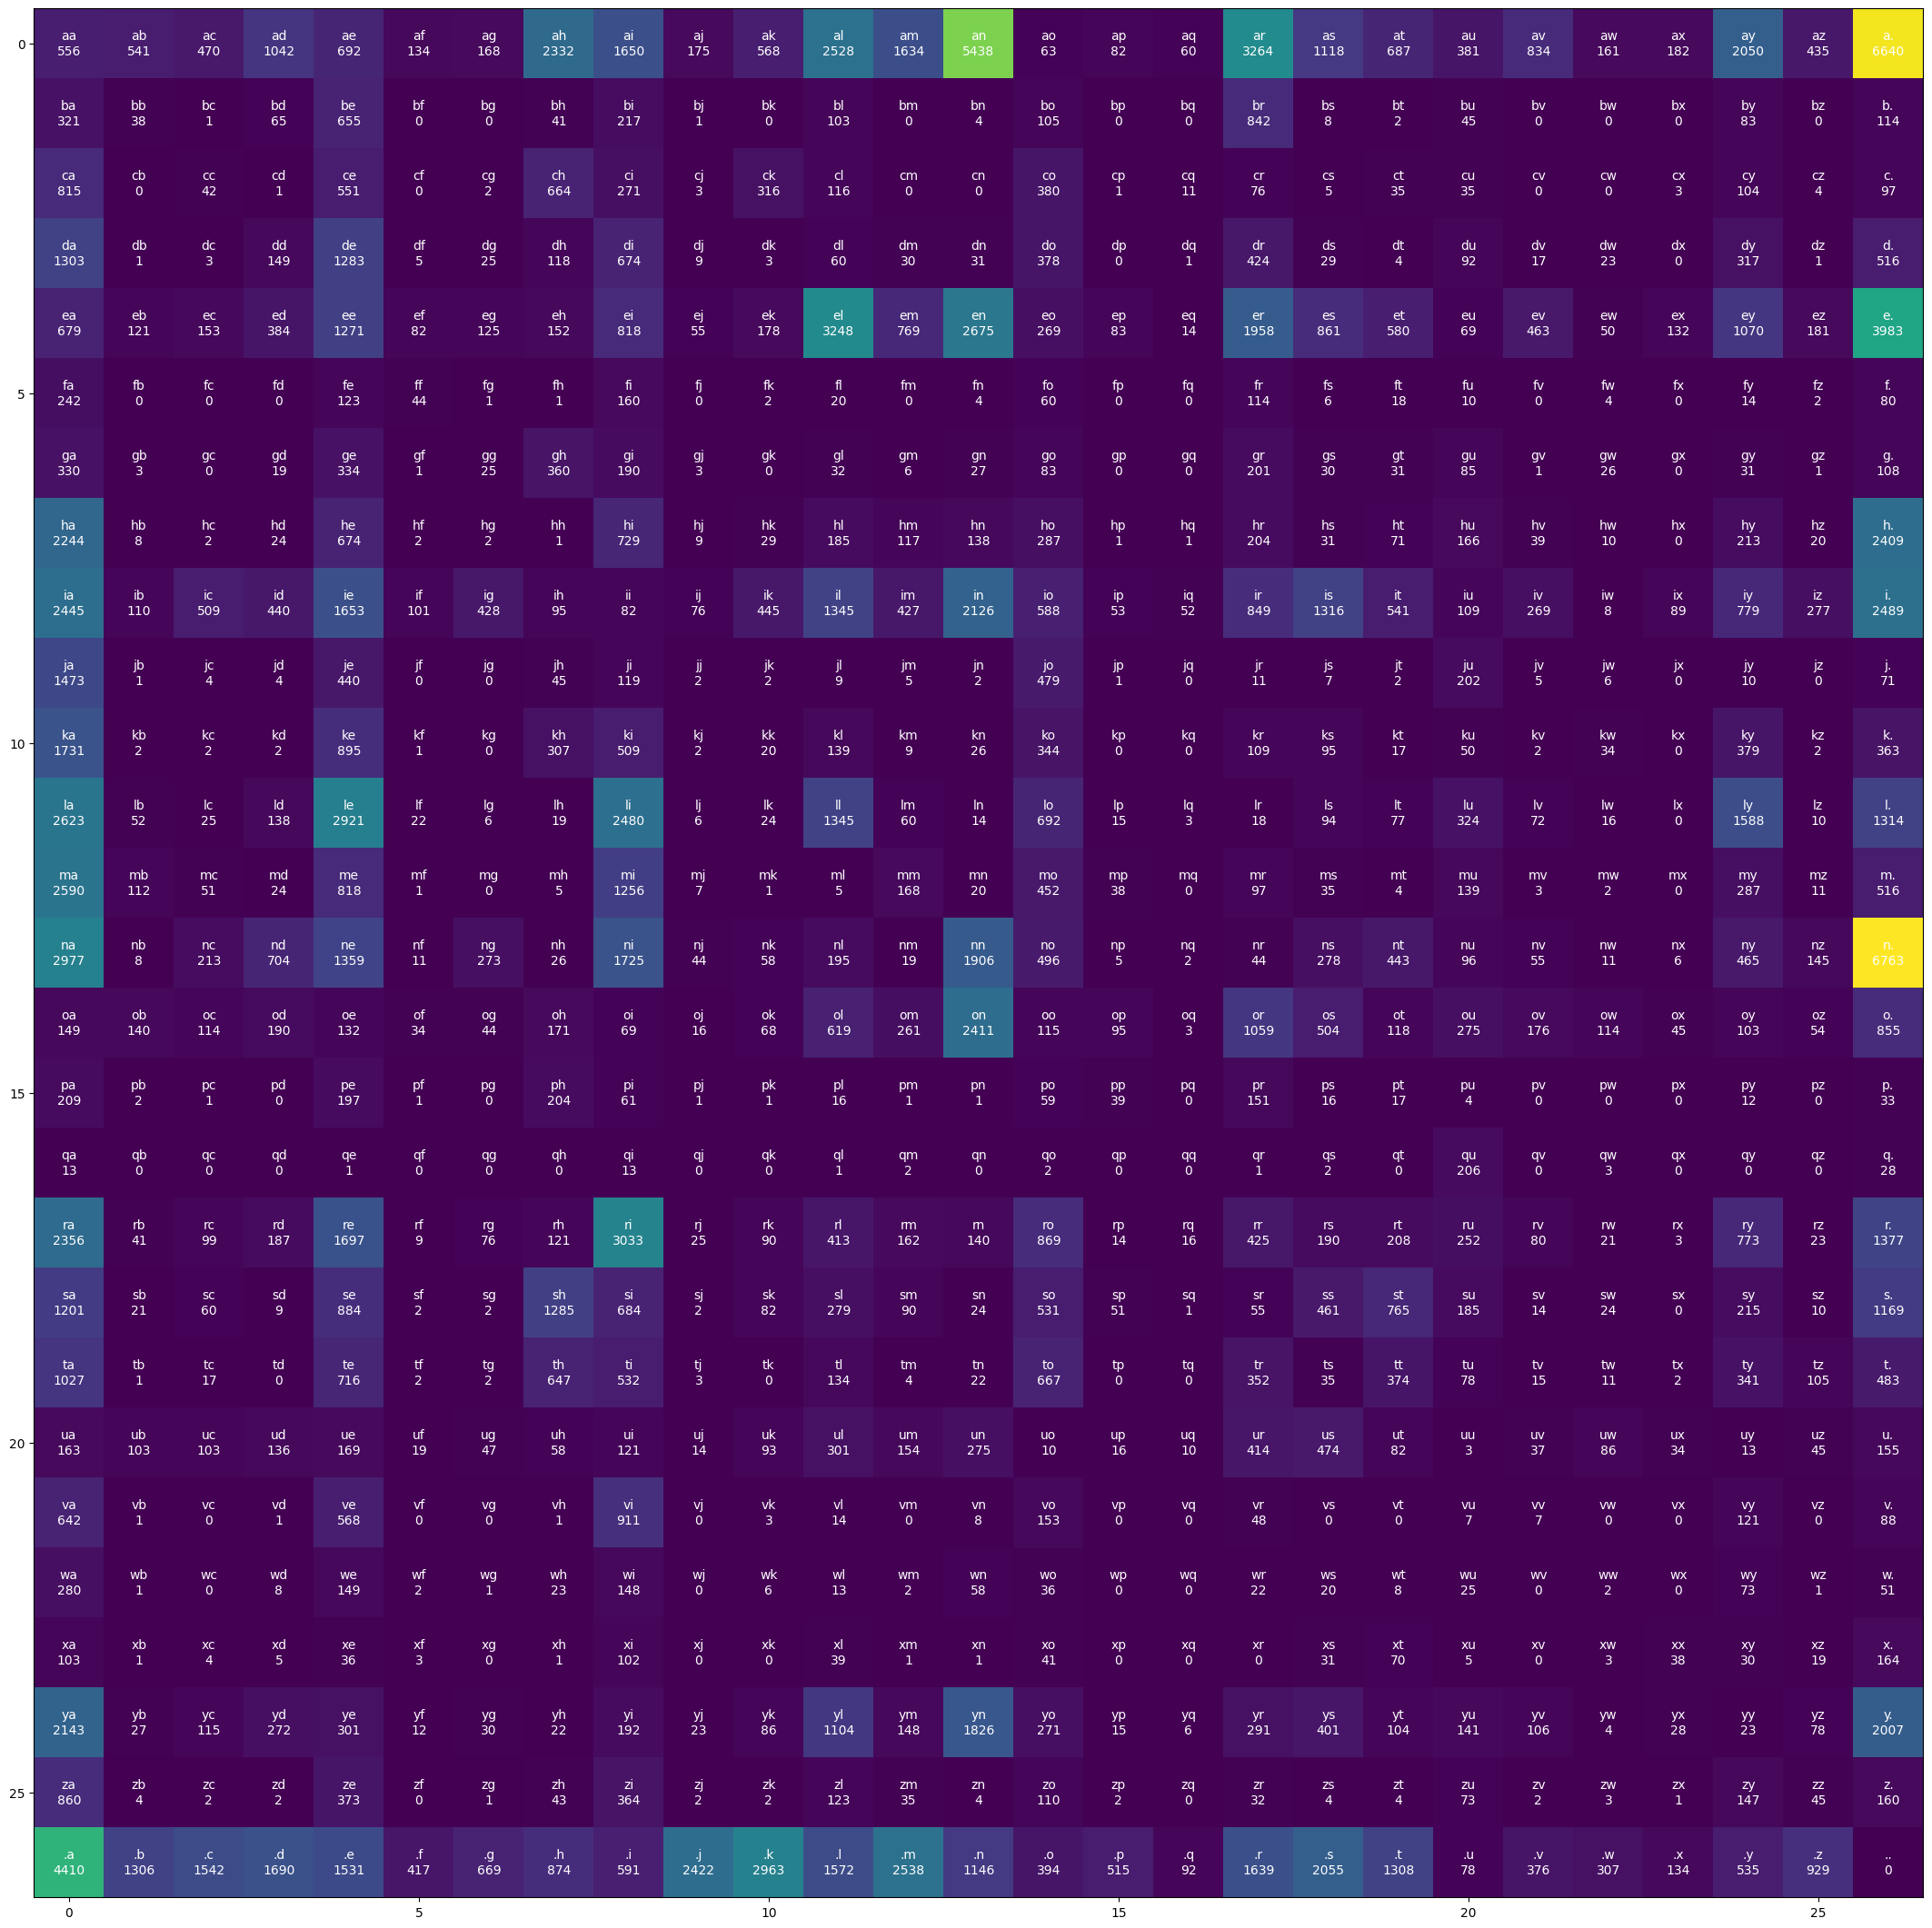

In [78]:
plt.figure(figsize=(27, 27))
plt.imshow(N, cmap='viridis')

for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        plt.text(j, i, f'{itoa(i)}{itoa(j)}\n{N[i, j].item()}',
                 ha="center", va="center", color="w")

In [116]:
N

# lets do sampling  - multinomial
for i in range(10):
    x = 0
    items = []
    while True:
        p = N[x]/N[x].sum()
        x = torch.multinomial(p, 1).item()
        items.append(itoa(x))
        if x == 26:
            break
    print(''.join(items))

ner.
lal.
mricka.
.
.
.
ch.
nanne.
neeen.
regamigsachiacackiem.


In [122]:
N.shape

torch.Size([27, 27])

In [121]:
# There is a beter way to sample

N.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [123]:
P = N / N.sum(1, keepdim=True)

In [127]:
P

tensor([[1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02, 3.9546e-03,
         4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02, 7.4605e-02,
         4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03, 9.6326e-02,
         3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03, 5.3711e-03,
         6.0499e-02, 1.2838e-02, 1.9596e-01],
        [1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01, 0.0000e+00,
         0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00, 3.8941e-02,
         0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00, 3.1834e-01,
         3.0246e-03, 7.5614e-04, 1.7013e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         3.1380e-02, 0.0000e+00, 4.3100e-02],
        [2.3075e-01, 0.0000e+00, 1.1891e-02, 2.8313e-04, 1.5600e-01, 0.0000e+00,
         5.6625e-04, 1.8800e-01, 7.6727e-02, 8.4938e-04, 8.9468e-02, 3.2843e-02,
         0.0000e+00, 0.0000e+00, 1.0759e-01, 2.8313e-04, 3.1144e-03, 2.1518e-02,
         1.4156e-

In [134]:
# Sampling using P

# lets do sampling  - multinomial
for i in range(10):
    x = 0
    items = []
    while True:
        x = torch.multinomial(P[x], 1).item()
        items.append(itoa(x))
        if x == 26:
            break
    print(''.join(items))

ifauan.
.
hak.
inisa.
n.
.
sa.
la.
.
.
